# 계층적 군집분석

In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [4]:
df = pd.read_excel('clustering/hkpca2.xlsx')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    1728 non-null   float64
 1   pca2    1728 non-null   float64
dtypes: float64(2)
memory usage: 27.1 KB


,pca1,pca2
0,2.244121,1.087567
1,2.250566,-0.395101
2,2.264217,-0.592941
3,2.287146,1.471589
4,2.292733,-0.571175
...,...,...
1723,-1.226808,-0.901973
1724,-1.225624,-0.929562
1725,-1.223762,-0.957030
1726,-1.221778,-0.786879


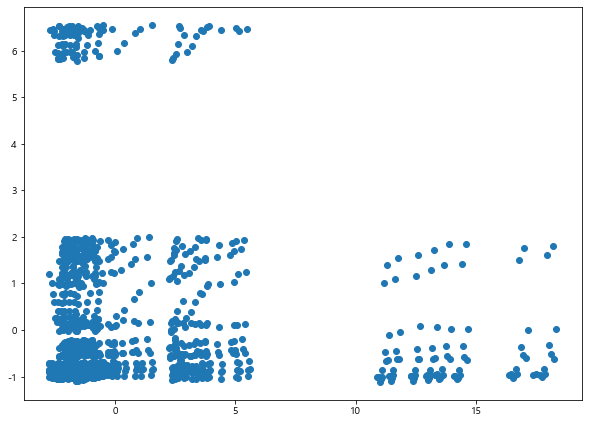

In [5]:
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(df.iloc[:,0], df.iloc[:,1])

plt.show()

In [6]:
linked = linkage(df, 'single')

In [7]:
from scipy.cluster.hierarchy import cut_tree
num_of_cluster = 3
cluster_info = cut_tree(linked, num_of_cluster)

In [8]:
cluster_info

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

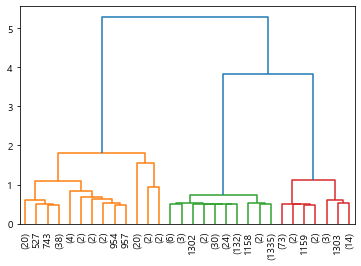

In [10]:
cutoff = 0.7*max(linked[:,2])

dendrogram(linked, leaf_rotation=90., truncate_mode='lastp', p=30, color_threshold=cutoff)
plt.show()

In [11]:
linked2 = linkage(df, method='complete')

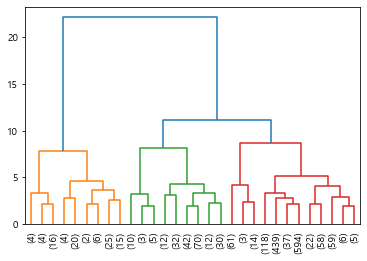

In [12]:
cutoff2 = 0.5*max(linked2[:,2])

dendrogram(linked2, leaf_rotation=90., truncate_mode='lastp', p=30, color_threshold=cutoff2)
plt.show()

In [13]:
linked3 = linkage(df, method='average')

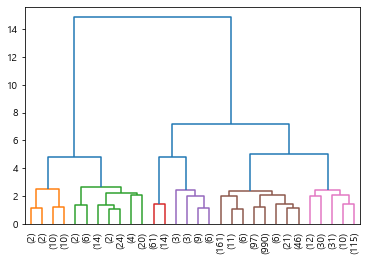

In [14]:
cutoff3 = 0.3*max(linked3[:,2])

dendrogram(linked3, leaf_rotation=90., truncate_mode='lastp', p=30, color_threshold=cutoff3)
plt.show()

In [ ]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x)
    y_kmed = kMedoids.fit_predict(x)
    silhouette_avg = silhouette_score(x, y_kmed)
    sw.append(silhouette_avg)